In [23]:
from darts import TimeSeries
from darts.dataprocessing.transformers import MissingValuesFiller
import pandas as pd

df = pd.read_csv('/home/p06lab/GEFCom2014-Solar-Energy-Forecasting/GEFCom2014-S_V2/Solar/Task 1/predictors1.csv', delimiter=",")
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], utc=False)
df
df.drop("ZONEID", axis=1, inplace=True)
df

,TIMESTAMP,VAR78,VAR79,VAR134,VAR157,VAR164,VAR165,VAR166,VAR167,VAR169,VAR175,VAR178,VAR228
0,2012-04-01 01:00:00,0.001967,0.003609,94843.6250,60.221909,0.244601,1.039334,-2.503039,294.448486,2577830.0,1202532.0,2861797.0,0.000000
1,2012-04-01 02:00:00,0.005524,0.033575,94757.9375,54.678604,0.457138,2.482865,-2.993330,295.651367,5356093.0,2446757.0,5949378.0,0.000000
2,2012-04-01 03:00:00,0.030113,0.132009,94732.8125,61.294891,0.771429,3.339867,-1.982535,294.454590,7921788.0,3681336.0,8939176.0,0.001341
3,2012-04-01 04:00:00,0.057167,0.110645,94704.0625,67.775284,0.965866,3.106102,-1.446051,293.261475,9860520.0,4921504.0,11331679.0,0.002501
4,2012-04-01 05:00:00,0.051027,0.189560,94675.0000,70.172989,0.944669,2.601146,-1.904493,292.732910,11143097.0,6254380.0,13105558.0,0.003331
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28435,2013-04-30 20:00:00,0.005329,0.000263,92731.0625,91.478485,0.349976,0.081752,0.419391,280.323975,6009325.0,23165536.0,8828003.0,0.001722
28436,2013-04-30 21:00:00,0.033720,0.001295,92729.0000,90.092712,0.439728,0.285248,0.397093,281.063232,6016603.0,24302592.0,8843853.0,0.001722
28437,2013-04-30 22:00:00,0.067539,0.008090,92767.7500,88.683670,0.421631,0.410435,0.270097,282.739746,6336696.0,25420208.0,9301340.0,0.001722
28438,2013-04-30 23:00:00,0.025291,0.002737,92752.6875,83.910080,0.564708,0.026751,-0.876187,284.758301,6995879.0,26585472.0,10227853.0,0.001722


In [24]:
label = pd.read_csv("/home/p06lab/GEFCom2014-Solar-Energy-Forecasting/GEFCom2014-S_V2/Solar/Task 1/train1.csv")
label.drop("ZONEID", axis=1, inplace=True)
label.drop("TIMESTAMP", axis=1, inplace=True)
label


,POWER
0,0.754103
1,0.555000
2,0.438397
3,0.145449
4,0.111987
...,...
26275,0.000000
26276,0.008025
26277,0.240075
26278,0.600100


In [26]:

merge_df = pd.merge(df, label, left_index=True, right_index=True)
merge_df

,TIMESTAMP,VAR78,VAR79,VAR134,VAR157,VAR164,VAR165,VAR166,VAR167,VAR169,VAR175,VAR178,VAR228,POWER
0,2012-04-01 01:00:00,0.001967,0.003609,94843.6250,60.221909,0.244601,1.039334,-2.503039,294.448486,2577830.0,1202532.0,2861797.0,0.000000,0.754103
1,2012-04-01 02:00:00,0.005524,0.033575,94757.9375,54.678604,0.457138,2.482865,-2.993330,295.651367,5356093.0,2446757.0,5949378.0,0.000000,0.555000
2,2012-04-01 03:00:00,0.030113,0.132009,94732.8125,61.294891,0.771429,3.339867,-1.982535,294.454590,7921788.0,3681336.0,8939176.0,0.001341,0.438397
3,2012-04-01 04:00:00,0.057167,0.110645,94704.0625,67.775284,0.965866,3.106102,-1.446051,293.261475,9860520.0,4921504.0,11331679.0,0.002501,0.145449
4,2012-04-01 05:00:00,0.051027,0.189560,94675.0000,70.172989,0.944669,2.601146,-1.904493,292.732910,11143097.0,6254380.0,13105558.0,0.003331,0.111987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26275,2013-03-31 20:00:00,0.181000,0.000000,92554.0000,95.633224,0.989838,0.704098,-1.182333,283.286133,9599917.0,24407344.0,12730024.0,0.001102,0.000000
26276,2013-03-31 21:00:00,0.138725,0.000000,92596.5000,95.174591,0.847382,0.949530,-1.746284,283.787842,9646734.0,25642688.0,12840550.0,0.001188,0.008025
26277,2013-03-31 22:00:00,0.063751,0.000000,92650.3750,92.287552,0.521332,1.212853,-2.753405,284.887451,10117295.0,26806400.0,13524435.0,0.001275,0.240075
26278,2013-03-31 23:00:00,0.030174,0.000000,92664.4375,77.448715,0.354523,1.678464,-2.329804,286.355713,11319735.0,27880320.0,14993721.0,0.001322,0.600100


/home/p06lab/miniconda3/lib/python3.11/site-packages/darts/timeseries.py:4736: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_time_index = resampled_time_index.asfreq(freq)


<Axes: xlabel='TIMESTAMP'>

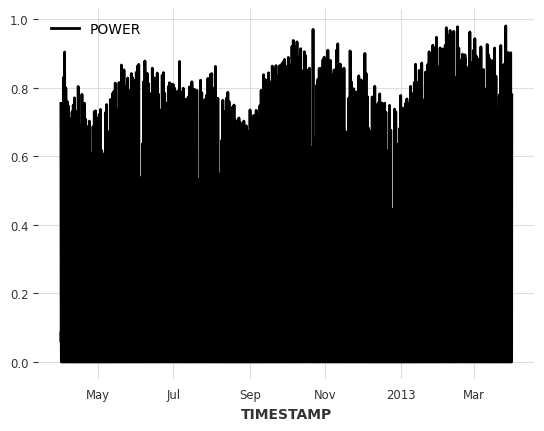

In [38]:
value_filler = MissingValuesFiller()

merge_df = merge_df.drop_duplicates(subset='TIMESTAMP')


series = value_filler.transform(
    TimeSeries.from_dataframe(
        merge_df, 
        freq = '1H',
        time_col='TIMESTAMP',
        value_cols=['POWER']
    )
)

series.plot()

In [39]:
series = series.add_datetime_attribute('day', one_hot=True)

from darts.dataprocessing.transformers import Scaler

train, val = series.split_after(pd.Timestamp('20130201'))

scaler = Scaler()
train_transformed = scaler.fit_transform(train)
val_transformed = scaler.transform(val)
series_transformed = scaler.transform(series)

In [49]:
from darts.models.forecasting.tcn_model import TCNModel


model = TCNModel(
    input_chunk_length=2160,  # Số lượng bước thời gian trong quá khứ để lấy làm đầu vào mô hình
    output_chunk_length=1,   # Số lượng bước thời gian dự đoán cùng một lúc bởi mô hình
    n_epochs=100,             # Số lượng epochs để đào tạo mô hình
    dropout=0,               # Tỷ lệ dropout cho mỗi lớp tích chập
    dilation_base=2,         # Cơ sở của số mũ xác định sự giãn nở ở mỗi cấp độ
    weight_norm=True,        # Có sử dụng chuẩn hóa trọng số hay không
    kernel_size=3,           # Kích thước của mỗi kernel trong lớp tích chập
    num_filters=[16,32,64],           # Số lượng bộ lọc trong lớp tích chập của TCN
    random_state=0,           # Kiểm soát sự ngẫu nhiên của khởi tạo trọng số
    num_layers = 10
)


In [51]:
model.fit(
    series=train_transformed,
    #val_series = val_transformed,
    verbose=True
)


/home/p06lab/miniconda3/lib/python3.11/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | res_blocks    | ModuleList       | 3.2 K 
---------------------------------------------------
3.2 K     Trainable params
0         Non-trainable params
3.2 K     Total params
0.013     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 162/162 [00:10<00:00, 15.69it/s, train_loss=0.0193]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 162/162 [00:10<00:00, 15.69it/s, train_loss=0.0193]


TCNModel(output_chunk_shift=0, kernel_size=5, num_filters=4, num_layers=10, dilation_base=2, weight_norm=True, dropout=0, input_chunk_length=2160, output_chunk_length=1, n_epochs=100, random_state=0)

`start` time `2013-02-02 00:00:00` is before the first predictable/trainable historical forecasting point for series at index: 0. Ignoring `start` for this series and beginning at first trainable/predictable time: 2013-02-16 06:00:00. To hide these warnings, set `show_warnings=False`.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 33/33 [00:01<00:00, 20.63it/s]


Number of components is larger than 10 (32). Plotting only the first 10 components.You can overwrite this in the using the `plot_all_components` argument in plot()Beware that plotting a large number of components may cause performance issues.
Number of components is larger than 10 (32). Plotting only the first 10 components.You can overwrite this in the using the `plot_all_components` argument in plot()Beware that plotting a large number of components may cause performance issues.


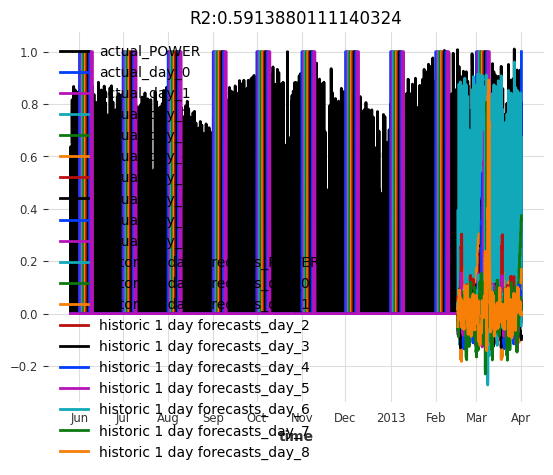

In [44]:
# Giả sử 'series_transformed' là đối tượng TimeSeries chứa dữ liệu của bạn

# Dự đoán
pred_series = model.historical_forecasts(
    series=val_transformed,
    start=pd.Timestamp('20130202'), 
    forecast_horizon=1,
    stride=5,
    retrain=False,
    verbose=True,
)

# Tính toán và vẽ biểu đồ R2
from darts.metrics import r2_score
import matplotlib.pyplot as plt

series_transformed[1316:].plot(label='actual')
pred_series.plot(label='historic 1 day forecasts')
r2_score_value = r2_score(series_transformed[1316:], pred_series)

plt.title('R2:' + str(r2_score_value))
plt.legend()
